Importing Req Lib

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Concat axis=0 for concatinating rows

In [3]:
df1=pd.read_csv('winequality_red.csv')
df2=pd.read_csv('winequality_white.csv')
data=pd.concat([df1,df2],axis=0)

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
data.shape

(6497, 12)

Getting No of Null Values In Dataset

In [8]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
x=data.drop('quality',axis=1)
y=data["quality"]

c:\Users\manas\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

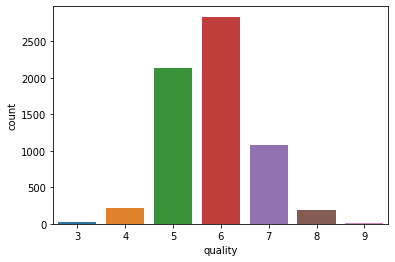

In [10]:
ax= sns.countplot(y, label="Count")
y.value_counts()

<AxesSubplot:>

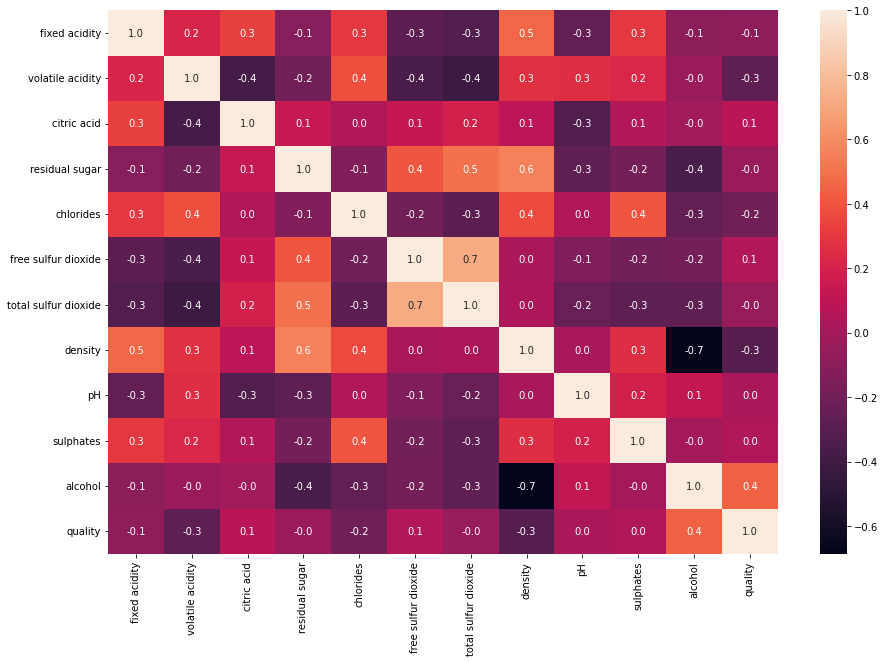

In [11]:
plt.subplots(figsize=(15,10))     
sns.heatmap(data.corr(),annot=True,fmt='.1f')

Performing Test To select Features that are more usefull.

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2,k="all")
fit = bestfeatures.fit(x,y)
dfscores =pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)
featuresScores = pd.concat([dfcolumns, dfscores],axis=1)
featuresScores.columns=['Specs','Score']
featuresScores

,Specs,Score
0,fixed acidity,11.115118
1,volatile acidity,42.528980
2,citric acid,3.673977
3,residual sugar,225.657151
4,chlorides,6.388650
5,free sulfur dioxide,913.332832
6,total sulfur dioxide,1269.974108
7,density,0.006600
8,pH,0.097332
9,sulphates,1.078473


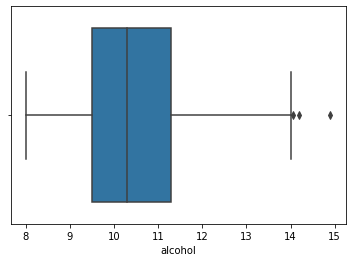

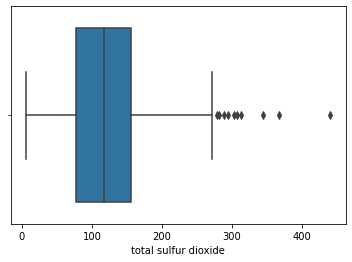

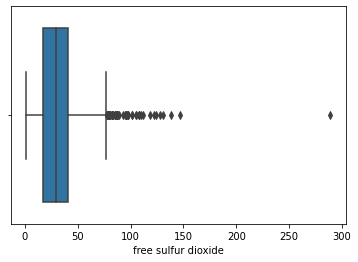

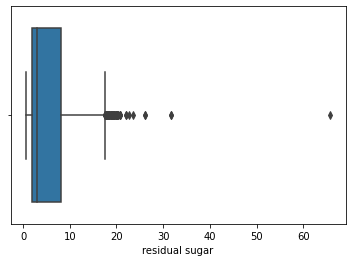

In [23]:
sns.boxplot(x="alcohol",data=data)
plt.show()
sns.boxplot(x="total sulfur dioxide",data=data)
plt.show()
sns.boxplot(x="free sulfur dioxide",data=data)
plt.show()
sns.boxplot(x="residual sugar",data=data)
plt.show()


Defining The Range Of features

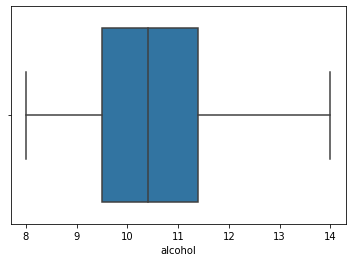

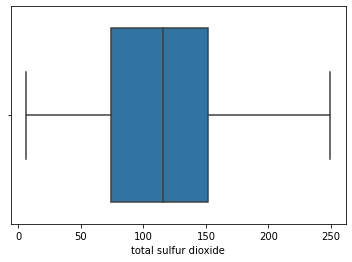

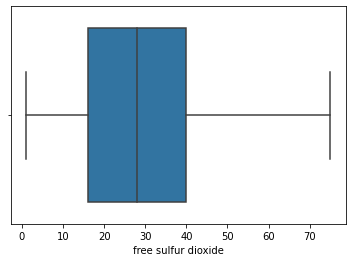

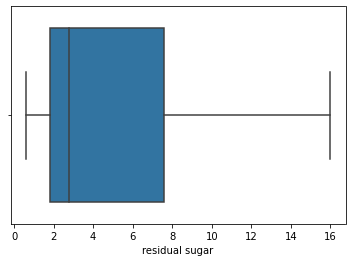

In [82]:
data=data[ 
    (data.alcohol<=14)
    & (data['total sulfur dioxide']<=260)
    & (data['free sulfur dioxide']<=75)
    & (data['residual sugar']<=16.4)   
]

sns.boxplot(x="alcohol",data=data)
plt.show()
sns.boxplot(x="total sulfur dioxide",data=data)
plt.show()
sns.boxplot(x="free sulfur dioxide",data=data)
plt.show()
sns.boxplot(x="residual sugar",data=data)
plt.show()

In [105]:
x=data.drop(["quality","fixed acidity","citric acid","chlorides","density","pH","sulphates"],axis=1)
y=data['quality']

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

In [108]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier(random_state=1)

RF.fit(x_train,y_train)

y_pred1=RF.predict(x_test)


print("Random Forest",accuracy_score(y_test,y_pred1))


Random Forest 0.6470905172413793
